In [216]:
##1. [Data Loading](#data-loading)

In [217]:
import pandas as pd

# Load the dataset

df = pd.read_csv(r'C:\Users\leona\OneDrive\retail_store_inventory.csv')


# Display the first few rows of the dataframe
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


## Exploratory Data Analysis (EDA)
In this section, we will inspect the dataset to understand its structure and contents. We will look at the first few rows, check for missing values, and examine the data types of each column. This will help us identify any data cleaning or preprocessing steps that may be necessary before further analysis.

In [218]:
### Data inspection

# display the data shape
df.shape

(73100, 15)

In [219]:
# Check data types
df.dtypes

Date                   object
Store ID               object
Product ID             object
Category               object
Region                 object
Inventory Level         int64
Units Sold              int64
Units Ordered           int64
Demand Forecast       float64
Price                 float64
Discount                int64
Weather Condition      object
Holiday/Promotion       int64
Competitor Pricing    float64
Seasonality            object
dtype: object

In [220]:

# Calculate descriptive statistics for numerical columns
df.describe()

# Identify missing values
df.isnull().sum()

# Analyze unique values and frequencies for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print("\n")


Column: Date
Date
2024-01-01    100
2022-01-01    100
2022-01-02    100
2022-01-03    100
2022-01-04    100
             ... 
2022-01-16    100
2022-01-15    100
2022-01-14    100
2022-01-13    100
2022-01-12    100
Name: count, Length: 731, dtype: int64


Column: Store ID
Store ID
S001    14620
S002    14620
S003    14620
S004    14620
S005    14620
Name: count, dtype: int64


Column: Product ID
Product ID
P0001    3655
P0002    3655
P0003    3655
P0004    3655
P0005    3655
P0006    3655
P0007    3655
P0008    3655
P0009    3655
P0010    3655
P0011    3655
P0012    3655
P0013    3655
P0014    3655
P0015    3655
P0016    3655
P0017    3655
P0018    3655
P0019    3655
P0020    3655
Name: count, dtype: int64


Column: Category
Category
Furniture      14699
Toys           14643
Clothing       14626
Groceries      14611
Electronics    14521
Name: count, dtype: int64


Column: Region
Region
East     18349
South    18297
North    18228
West     18226
Name: count, dtype: int64


Column: Weat

### Data Visualization

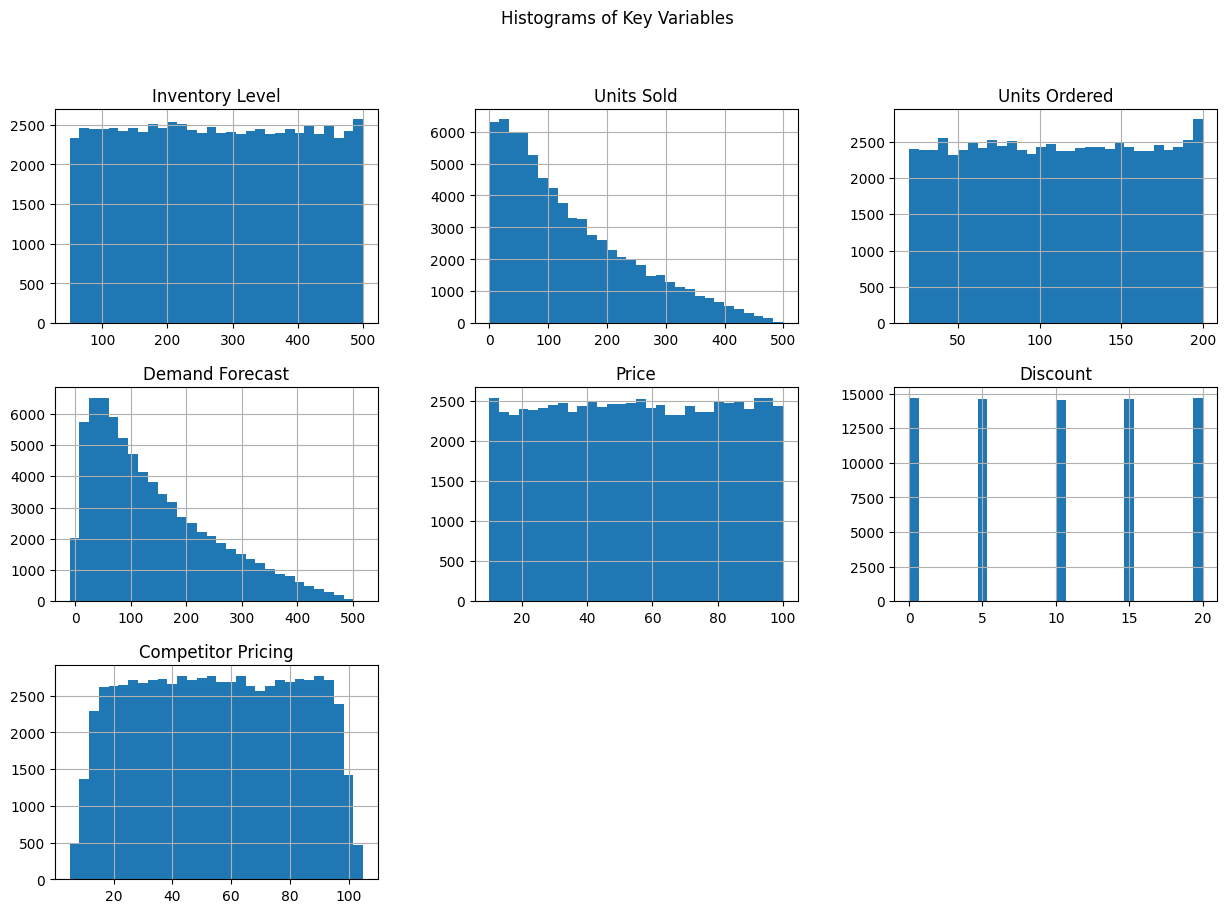

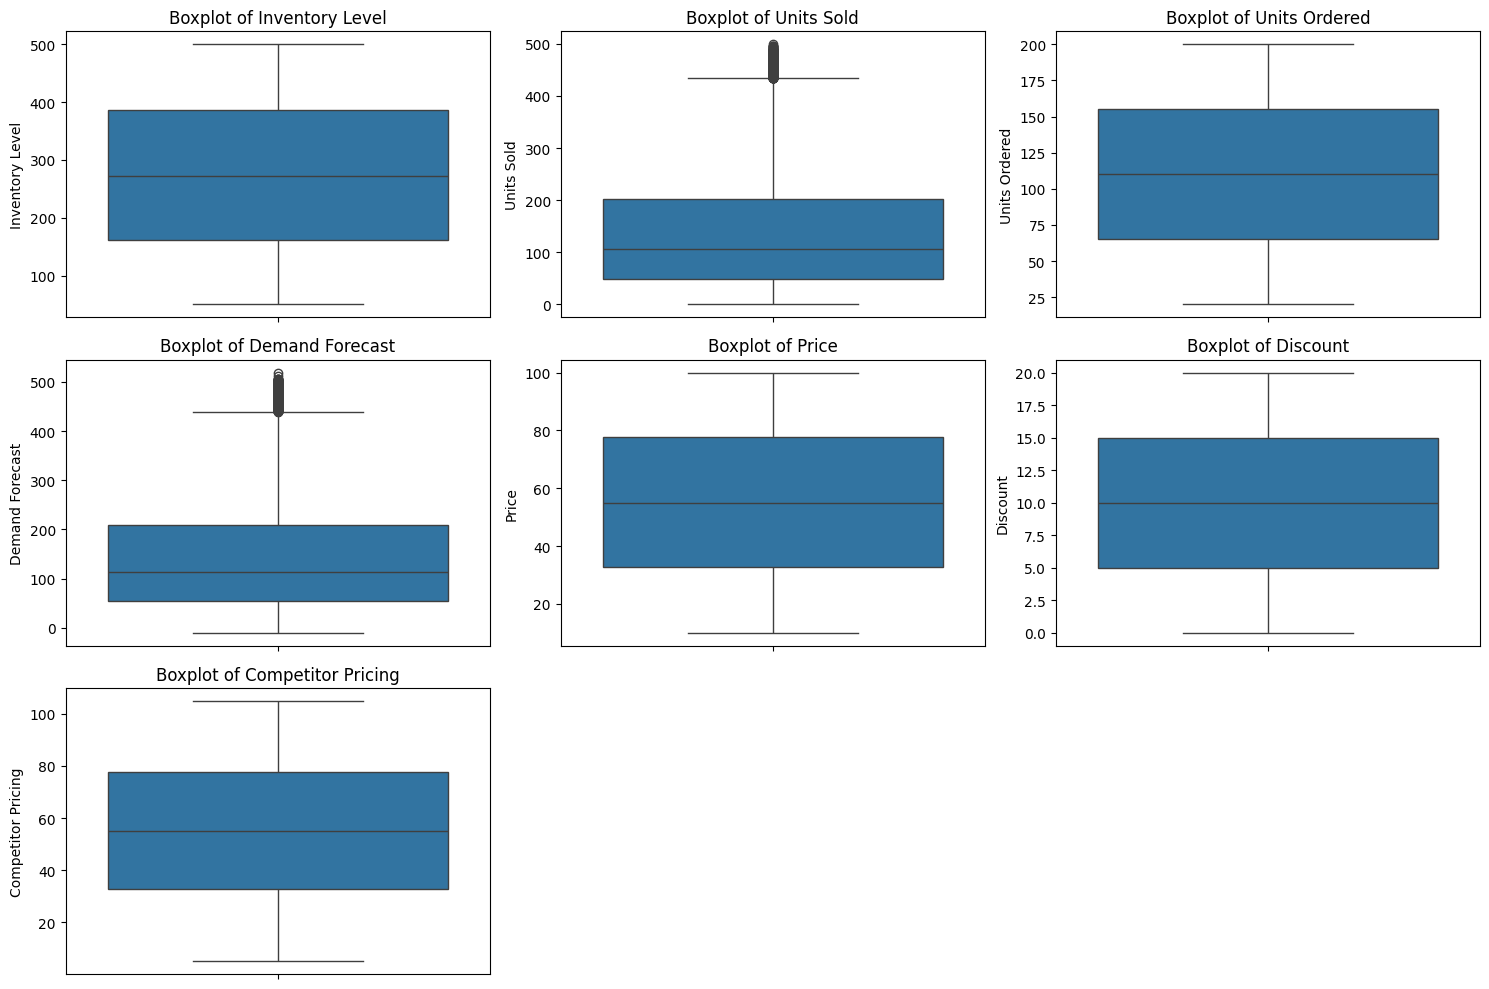

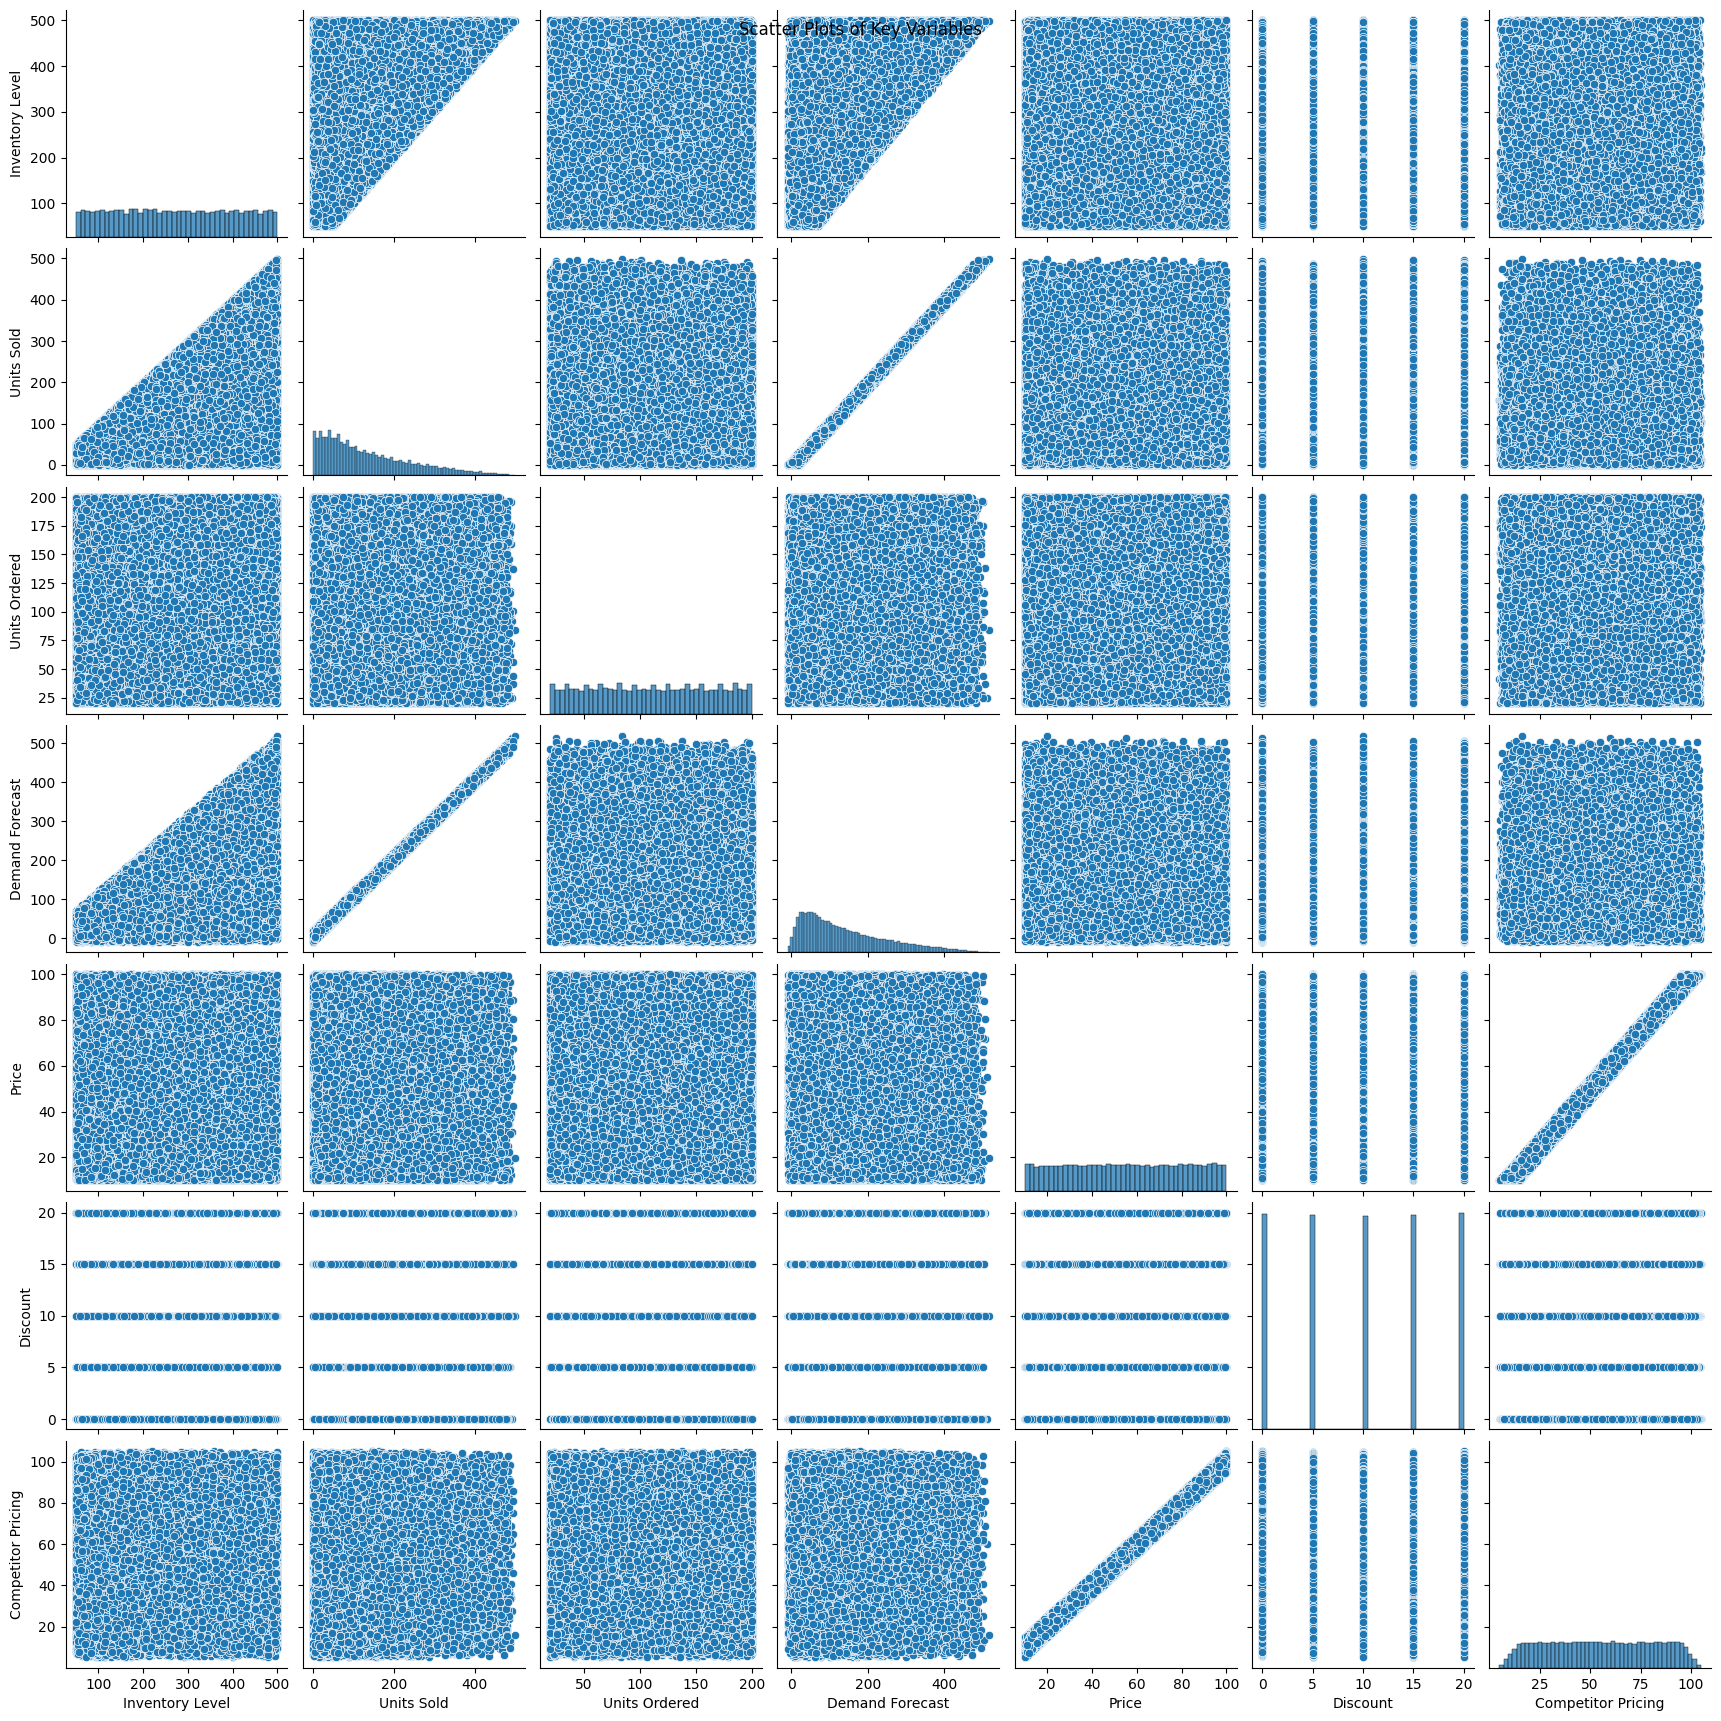

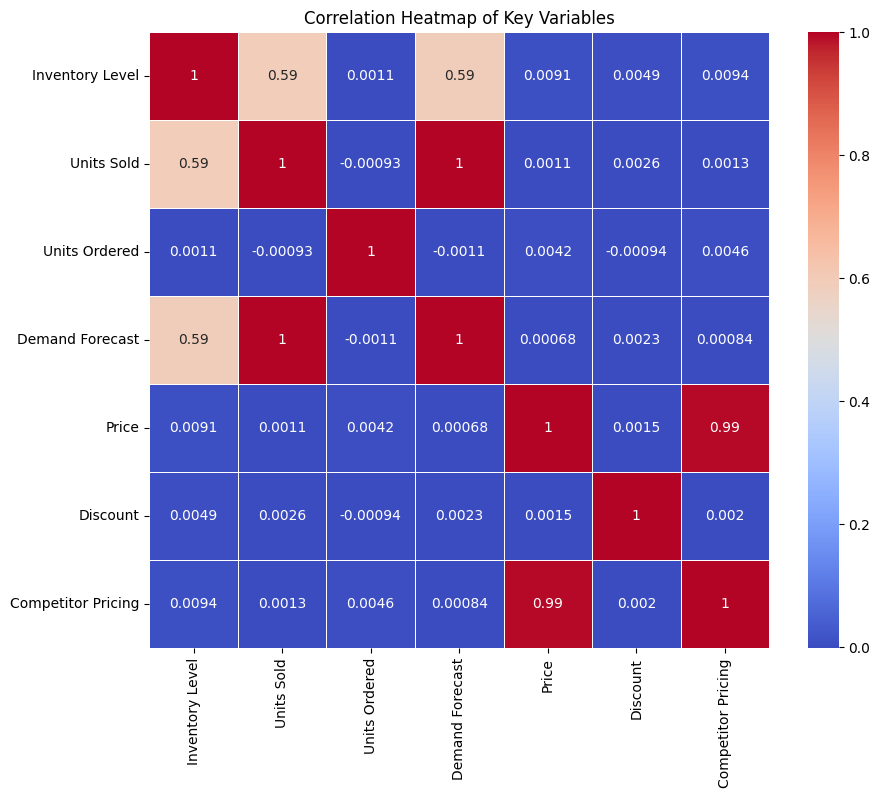

In [221]:
import seaborn as sns

import matplotlib.pyplot as plt

# Plot histograms for key variables
key_variables = ['Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast', 'Price', 'Discount', 'Competitor Pricing']
df[key_variables].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Key Variables')
plt.show()

# Plot boxplots for key variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(key_variables, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[var])
    plt.title(f'Boxplot of {var}')
plt.tight_layout()
plt.show()

# Analyze correlations using scatter plots
sns.pairplot(df[key_variables])
plt.suptitle('Scatter Plots of Key Variables')
plt.show()

# Analyze correlations using heatmap
correlation_matrix = df[key_variables].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Key Variables')
plt.show()

In [222]:
## Data Preparation

In [223]:
### Outlier Detection and Removal

In [224]:
def detect_outliers_iqr(df, column):
    """
    Detect outliers in a dataframe column using the IQR method.
    
    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    column (str): The column name to detect outliers in.
    
    Returns:
    pd.Series: A boolean series indicating whether each value is an outlier.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[column] < lower_bound) | (df[column] > upper_bound)

def remove_outliers_iqr(df, column):
    """
    Remove outliers from a dataframe column using the IQR method.
    
    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    column (str): The column name to remove outliers from.
    
    Returns:
    pd.DataFrame: The dataframe with outliers removed.
    """
    outliers = detect_outliers_iqr(df, column)
    return df[~outliers]

# Analyze and remove outliers for key variables
for var in key_variables:
    print(f"Analyzing outliers for {var}")
    outliers = detect_outliers_iqr(df, var)
    print(f"Number of outliers in {var}: {outliers.sum()}")
    df = remove_outliers_iqr(df, var)
    print(f"Number of rows after removing outliers in {var}: {df.shape[0]}")

Analyzing outliers for Inventory Level
Number of outliers in Inventory Level: 0
Number of rows after removing outliers in Inventory Level: 73100
Analyzing outliers for Units Sold
Number of outliers in Units Sold: 715
Number of rows after removing outliers in Units Sold: 72385
Analyzing outliers for Units Ordered
Number of outliers in Units Ordered: 0
Number of rows after removing outliers in Units Ordered: 72385
Analyzing outliers for Demand Forecast
Number of outliers in Demand Forecast: 241
Number of rows after removing outliers in Demand Forecast: 72144
Analyzing outliers for Price
Number of outliers in Price: 0
Number of rows after removing outliers in Price: 72144
Analyzing outliers for Discount
Number of outliers in Discount: 0
Number of rows after removing outliers in Discount: 72144
Analyzing outliers for Competitor Pricing
Number of outliers in Competitor Pricing: 0
Number of rows after removing outliers in Competitor Pricing: 72144


In [225]:
# Remove negative values from numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = df[numerical_columns].applymap(lambda x: x if x >= 0 else None)



C:\Users\leona\AppData\Local\Temp\ipykernel_20976\85297656.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[numerical_columns] = df[numerical_columns].applymap(lambda x: x if x >= 0 else None)


In [226]:
### key variables relationship and trend analysis   



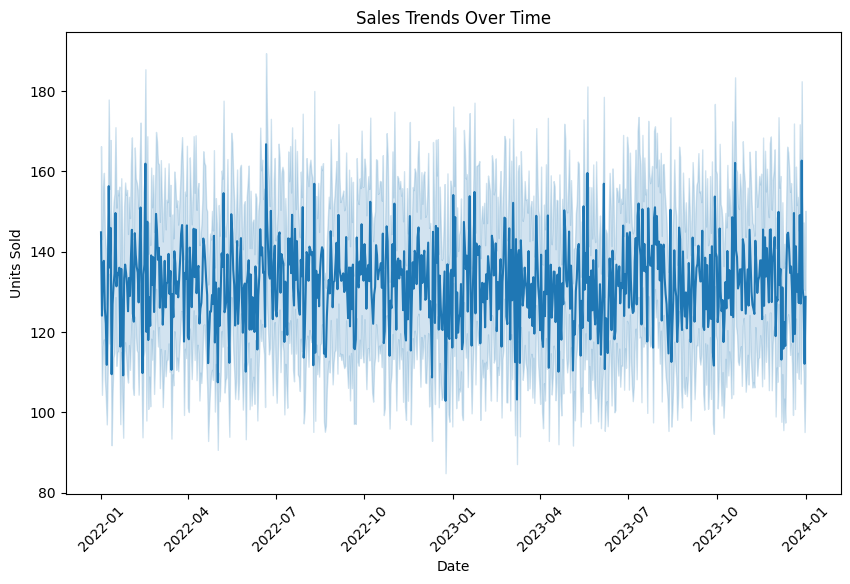

In [227]:
# 1. Sales Trends Over Time
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='Units Sold')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()

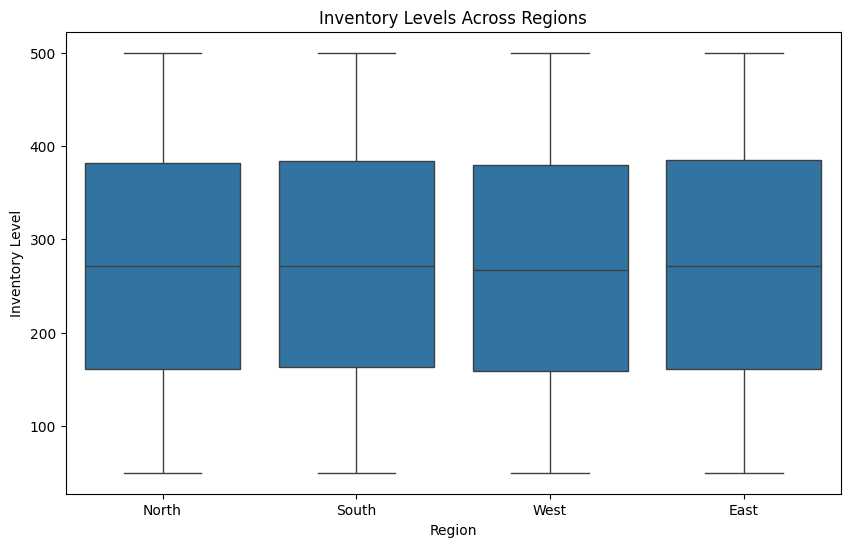

In [228]:
# 2. Inventory Levels Across Regions
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region', y='Inventory Level')
plt.title('Inventory Levels Across Regions')
plt.xlabel('Region')
plt.ylabel('Inventory Level')
plt.show()

Text(0.5, 1.0, 'Sales by Weather')

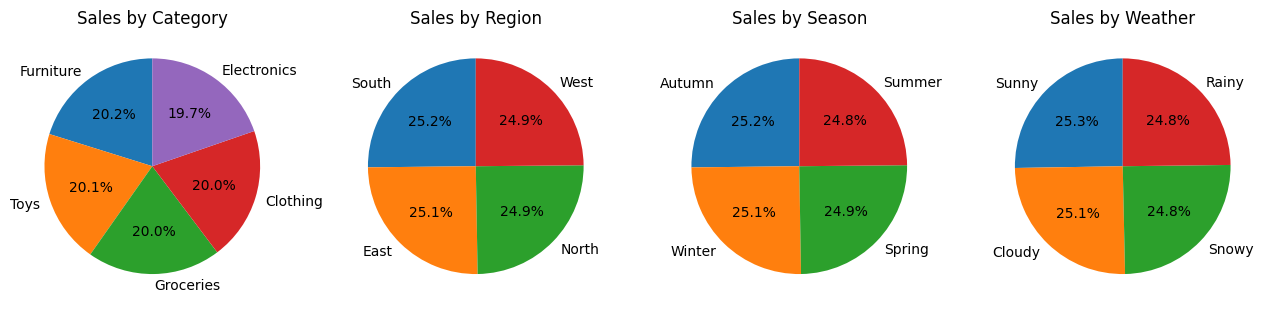

In [229]:
# 4. Sales by Category and Region
sales_by_category = df.groupby('Category')['Units Sold'].sum().sort_values(ascending=False)
sales_by_region = df.groupby('Region')['Units Sold'].sum().sort_values(ascending=False)


# Plot pie charts in a subplot
fig, axes = plt.subplots(1, 4, figsize=(16, 8))

# Pie chart for sales by category
axes[0].pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Sales by Category')

# Pie chart for sales by region
axes[1].pie(sales_by_region, labels=sales_by_region.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Sales by Region')

# Pie for sales by seasson
sales_by_season = df.groupby('Seasonality')['Units Sold'].sum().sort_values(ascending=False)
axes[2].pie(sales_by_season, labels=sales_by_season.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Sales by Season')

# pie for sales by weather
sales_by_weather = df.groupby('Weather Condition')['Units Sold'].sum().sort_values(ascending=False)
axes[3].pie(sales_by_weather, labels=sales_by_weather.index, autopct='%1.1f%%', startangle=90)
axes[3].set_title('Sales by Weather')




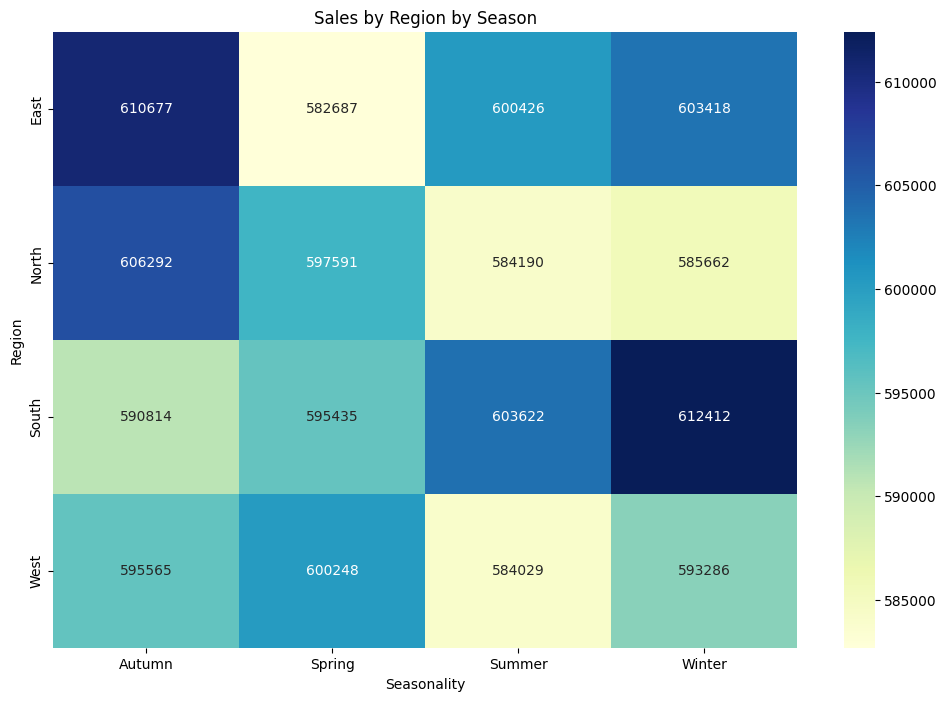

In [230]:
# Pivot the data to create a matrix for the heatmap
sales_pivot = df.pivot_table(values='Units Sold', index='Region', columns='Seasonality', aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sales_pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Sales by Region by Season')
plt.xlabel('Seasonality')
plt.ylabel('Region')
plt.show()

### Time Series Preparation

In [231]:
from statsmodels.tsa.stattools import adfuller

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Aggregate the data by day to calculate daily demand
daily_demand = df.resample('D').sum()

# Perform ADF test to check dataset stationarity
result = adfuller(daily_demand['Demand Forecast'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value (%s): %f' % (key, value))

ADF Statistic: -26.34407329854863
p-value: 0.0
Critical Value (1%): -3.439340
Critical Value (5%): -2.865507
Critical Value (10%): -2.568883


## Modeling and Cross Validation

### ARIMA Model

C:\Users\leona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\leona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA Cross Validation Results:
Mean RMSE: 1000.05 (Std: 60.48)
Mean MAE:  800.38  (Std: 46.39)
Mean R²:   -0.0016   (Std: 0.0019)
                               SARIMAX Results                                
Dep. Variable:             Units Sold   No. Observations:                  731
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -6090.902
Date:                Sun, 06 Apr 2025   AIC                          12189.805
Time:                        20:03:13   BIC                          12208.182
Sample:                    01-01-2022   HQIC                         12196.894
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.306e+04     37.132    351.702      0.000     1.3e+04    1.31e+04


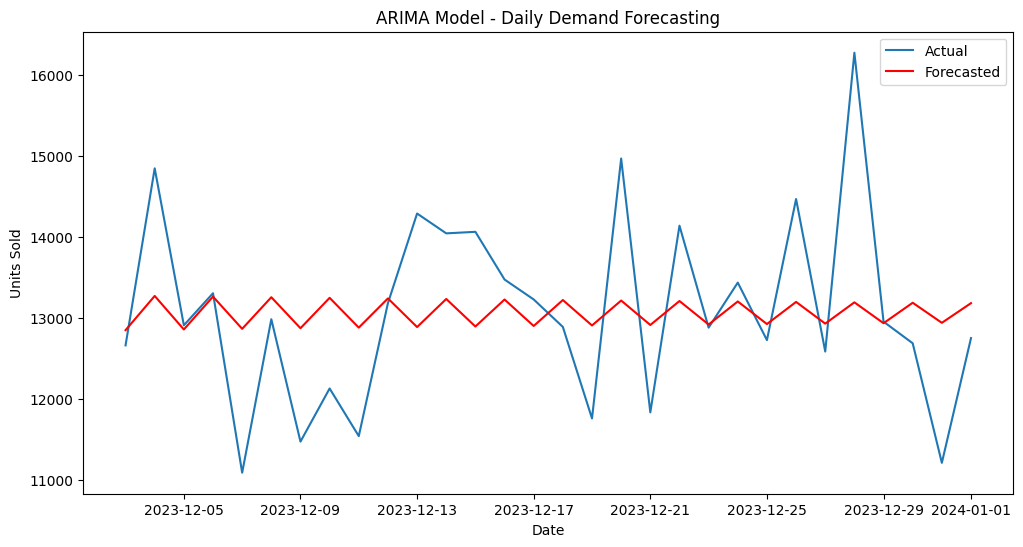

In [232]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns



# Aggregate the data by day to calculate daily demand
daily_demand = df.resample('D').sum()

# Define Cross-Validation Function for ARIMA
def cross_validate_arima(data, order, n_splits=5):
    rmse_scores = []
    mae_scores = []
    r2_scores = []
    n = len(data)
    fold_size = n // (n_splits + 1)
    
    for i in range(1, n_splits + 1):
        train = data[: i * fold_size]
        test = data[i * fold_size: (i + 1) * fold_size]
        try:
            model = ARIMA(train, order=order)
            model_fit = model.fit()
            forecast = model_fit.forecast(steps=len(test))
            rmse = sqrt(mean_squared_error(test, forecast))
            mae = mean_absolute_error(test, forecast)
            r2 = r2_score(test, forecast)
            rmse_scores.append(rmse)
            mae_scores.append(mae)
            r2_scores.append(r2)
        except Exception as e:
            print(f"Fold {i} failed with error: {e}")
    
    return (np.mean(rmse_scores), np.std(rmse_scores)), \
           (np.mean(mae_scores), np.std(mae_scores)), \
           (np.mean(r2_scores), np.std(r2_scores))

# Perform Cross-Validation for ARIMA
order_arima = (1, 0, 1)
(arima_rmse, arima_mae, arima_r2) = cross_validate_arima(daily_demand['Units Sold'], order=order_arima, n_splits=5)
print("ARIMA Cross Validation Results:")
print(f"Mean RMSE: {arima_rmse[0]:.2f} (Std: {arima_rmse[1]:.2f})")
print(f"Mean MAE:  {arima_mae[0]:.2f}  (Std: {arima_mae[1]:.2f})")
print(f"Mean R²:   {arima_r2[0]:.4f}   (Std: {arima_r2[1]:.4f})")

# Fit the final ARIMA model on the entire dataset
final_model_arima = ARIMA(daily_demand['Units Sold'], order=order_arima)
final_model_fit_arima = final_model_arima.fit()
print(final_model_fit_arima.summary())  # Display the ARIMA model summary

# Define the test set
test_size = 30  # Define the size of the test set
train = daily_demand['Units Sold'][:-test_size]
test = daily_demand['Units Sold'][-test_size:]

# Forecast the test set using the final ARIMA model
forecast_arima = final_model_fit_arima.forecast(steps=test_size)

# Display the forecasted values
print(forecast_arima)



# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast_arima, label='Forecasted', color='red')
plt.title('ARIMA Model - Daily Demand Forecasting')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

In [233]:
### SARIMA Model


SARIMA Cross Validation Results:
Mean RMSE: 1102.80 (Std: 110.42)
Mean MAE:  886.53  (Std: 80.36)
Mean R²:   -0.22   (Std: 0.17)
                                     SARIMAX Results                                     
Dep. Variable:                        Units Sold   No. Observations:                  731
Model:             SARIMAX(0, 0, 1)x(1, 1, 1, 7)   Log Likelihood               -6144.136
Date:                           Sun, 06 Apr 2025   AIC                          12296.271
Time:                                   20:03:18   BIC                          12314.611
Sample:                               01-01-2022   HQIC                         12303.349
                                    - 01-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

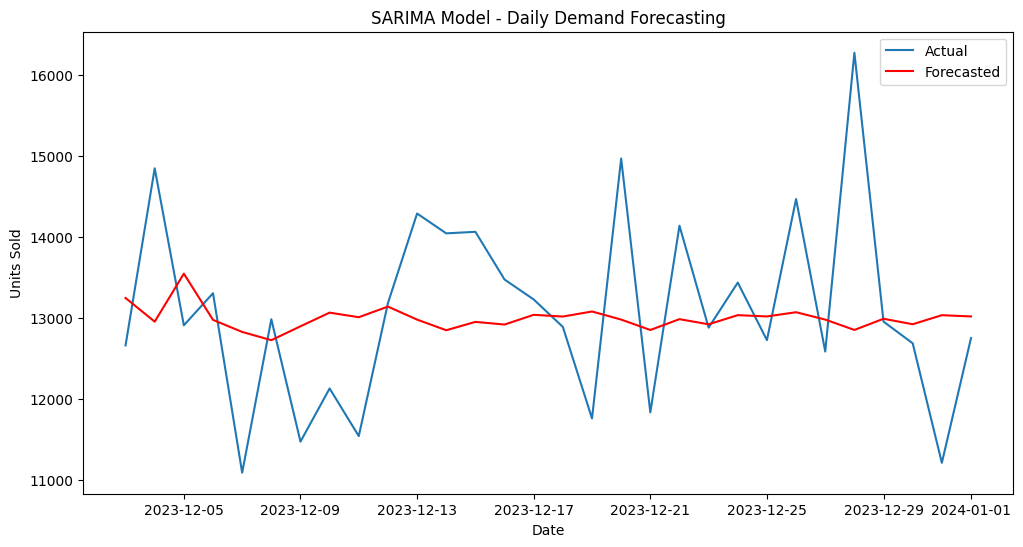

In [234]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns


# Aggregate the data by day to calculate daily demand
daily_demand = df.resample('D').sum()

# Define Cross-Validation Function for SARIMA
def cross_validate_sarima(data, order, seasonal_order, n_splits=5):
    rmse_scores = []
    mae_scores = []
    r2_scores = []
    
    n = len(data)
    fold_size = n // (n_splits + 1)
    
    for i in range(1, n_splits + 1):
        train = data[: i * fold_size]
        test = data[i * fold_size: (i + 1) * fold_size]
        try:
            model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
            model_fit = model.fit(disp=False)
            forecast = model_fit.forecast(steps=len(test))
            rmse = sqrt(mean_squared_error(test, forecast))
            mae = mean_absolute_error(test, forecast)
            r2 = r2_score(test, forecast)
            rmse_scores.append(rmse)
            mae_scores.append(mae)
            r2_scores.append(r2)
        except Exception as e:
            print(f"Fold {i} failed with error: {e}")
    
    return (np.mean(rmse_scores), np.std(rmse_scores)), \
           (np.mean(mae_scores), np.std(mae_scores)), \
           (np.mean(r2_scores), np.std(r2_scores))

# Perform Cross-Validation for SARIMA
order_sarima = (0, 0, 1)
seasonal_order = (1, 1, 1, 7)  # Here, 
(sarima_rmse, sarima_mae, sarima_r2) = cross_validate_sarima(daily_demand['Units Sold'], 
                                                             order=order_sarima, 
                                                             seasonal_order=seasonal_order, 
                                                             n_splits=5)

print("\nSARIMA Cross Validation Results:")
print(f"Mean RMSE: {sarima_rmse[0]:.2f} (Std: {sarima_rmse[1]:.2f})")
print(f"Mean MAE:  {sarima_mae[0]:.2f}  (Std: {sarima_mae[1]:.2f})")
print(f"Mean R²:   {sarima_r2[0]:.2f}   (Std: {sarima_r2[1]:.2f})")

# Fit the final SARIMA model on the entire dataset
final_model_sarima = SARIMAX(daily_demand['Units Sold'], order=order_sarima, seasonal_order=seasonal_order)
final_model_fit_sarima = final_model_sarima.fit(disp=False)
print(final_model_fit_sarima.summary())  # Display the SARIMA model summary

# Define the test set
test_size = 30  # Define the size of the test set
train = daily_demand['Units Sold'][:-test_size]
test = daily_demand['Units Sold'][-test_size:]

# Forecast the test set using the final SARIMA model
forecast_sarima = final_model_fit_sarima.forecast(steps=test_size)

# Display the forecasted values
print(forecast_sarima)

# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast_sarima, label='Forecasted', color='red')
plt.title('SARIMA Model - Daily Demand Forecasting')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

### Prophet Model

20:37:52 - cmdstanpy - INFO - Chain [1] start processing
20:37:53 - cmdstanpy - INFO - Chain [1] done processing
20:37:53 - cmdstanpy - INFO - Chain [1] start processing
20:37:53 - cmdstanpy - INFO - Chain [1] done processing
20:37:53 - cmdstanpy - INFO - Chain [1] start processing
20:37:53 - cmdstanpy - INFO - Chain [1] done processing
20:37:53 - cmdstanpy - INFO - Chain [1] start processing
20:37:54 - cmdstanpy - INFO - Chain [1] done processing
20:37:54 - cmdstanpy - INFO - Chain [1] start processing
20:37:54 - cmdstanpy - INFO - Chain [1] done processing
20:37:54 - cmdstanpy - INFO - Chain [1] start processing



Prophet Cross Validation Results with Discount as Regressor:
Mean RMSE: 1019.25 (Std: 64.85)
Mean MAE:  816.59  (Std: 58.77)
Mean R²:   -0.04   (Std: 0.03)


20:37:54 - cmdstanpy - INFO - Chain [1] done processing


            ds          yhat    yhat_lower    yhat_upper
756 2024-01-27  12412.833620  11155.601355  13654.515064
757 2024-01-28  12554.996733  11290.936886  13766.089892
758 2024-01-29  12489.755155  11198.877447  13647.640458
759 2024-01-30  12600.118139  11410.030074  13891.569683
760 2024-01-31  12588.256352  11378.518480  13905.186829


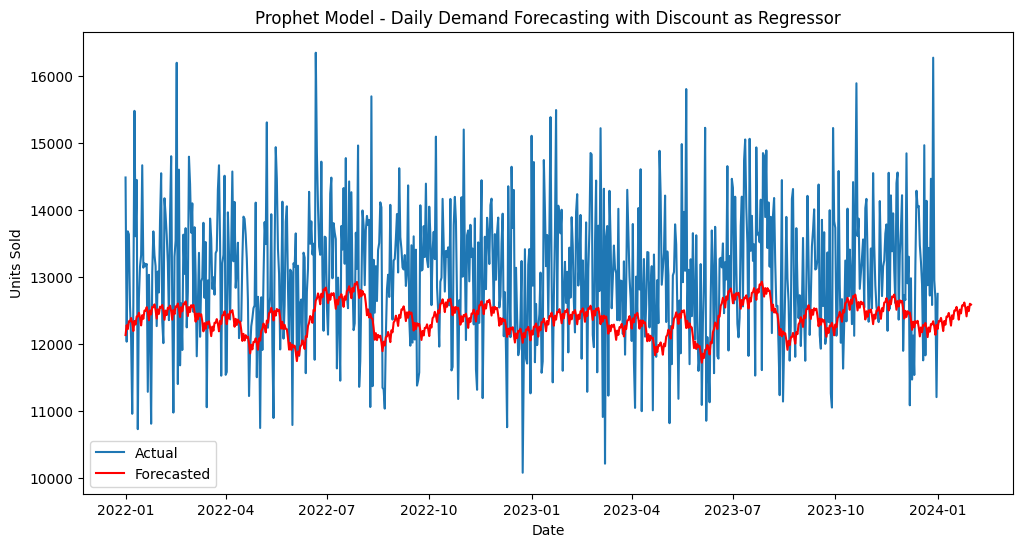

In [249]:
import numpy as np
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate the data by day to calculate daily demand
daily_demand = df.resample('D').sum().reset_index()

# Rename columns for Prophet
prophet_data = daily_demand.rename(columns={
    'Date': 'ds',
    'Units Sold': 'y',
    'Discount': 'discount'
})

# Define Cross-Validation Function for Prophet
def cross_validate_prophet_with_regressor(data, n_splits=5):
    rmse_scores = []
    mae_scores = []
    r2_scores = []
    
    n = len(data)
    fold_size = n // (n_splits + 1)
    
    for i in range(1, n_splits + 1):
        train = data[: i * fold_size].reset_index(drop=True)
        test = data[i * fold_size: (i + 1) * fold_size].reset_index(drop=True)
        try:
            # Initialize Prophet with regressor
            model = Prophet()
            model.add_regressor('discount')  # Add Discount as a regressor
            model.fit(train)
            
            # Forecast
            future = test[['ds']].copy()  # Use the test dataset's dates for forecasting
            future['discount'] = test['discount'].values  # Add discount values to future DataFrame
            forecast = model.predict(future)['yhat'].values
            
            # Evaluate
            rmse = sqrt(mean_squared_error(test['y'], forecast))
            mae = mean_absolute_error(test['y'], forecast)
            r2 = r2_score(test['y'], forecast)
            rmse_scores.append(rmse)
            mae_scores.append(mae)
            r2_scores.append(r2)
        except Exception as e:
            print(f"Fold {i} failed with error: {e}")
    
    # Handle cases where no valid folds exist
    if len(rmse_scores) == 0:
        return (np.nan, np.nan), (np.nan, np.nan), (np.nan, np.nan)
    
    return (np.mean(rmse_scores), np.std(rmse_scores)), \
           (np.mean(mae_scores), np.std(mae_scores)), \
           (np.mean(r2_scores), np.std(r2_scores))

# Perform Cross-Validation for Prophet with Discount as a regressor
(prophet_rmse, prophet_mae, prophet_r2) = cross_validate_prophet_with_regressor(prophet_data, n_splits=5)
print("\nProphet Cross Validation Results with Discount as Regressor:")
print(f"Mean RMSE: {prophet_rmse[0]:.2f} (Std: {prophet_rmse[1]:.2f})")
print(f"Mean MAE:  {prophet_mae[0]:.2f}  (Std: {prophet_mae[1]:.2f})")
print(f"Mean R²:   {prophet_r2[0]:.2f}   (Std: {prophet_r2[1]:.2f})")

# Fit the final Prophet model on the entire dataset
final_model_prophet = Prophet()
final_model_prophet.add_regressor('discount')  # Add Discount as a regressor
final_model_prophet.fit(prophet_data)

# Forecast future values
future = final_model_prophet.make_future_dataframe(periods=30)  # Forecast for 30 days
future['discount'] = 0  # Assume no discount for future periods (or set realistic values)
forecast_prophet = final_model_prophet.predict(future)

# Display the forecasted values
print(forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(prophet_data['ds'], prophet_data['y'], label='Actual')
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Forecasted', color='red')
plt.title('Prophet Model - Daily Demand Forecasting with Discount as Regressor')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

21:01:15 - cmdstanpy - INFO - Chain [1] start processing
21:01:15 - cmdstanpy - INFO - Chain [1] done processing
21:01:15 - cmdstanpy - INFO - Chain [1] start processing
21:01:15 - cmdstanpy - INFO - Chain [1] done processing
21:01:16 - cmdstanpy - INFO - Chain [1] start processing
21:01:16 - cmdstanpy - INFO - Chain [1] done processing
21:01:16 - cmdstanpy - INFO - Chain [1] start processing
21:01:16 - cmdstanpy - INFO - Chain [1] done processing
21:01:16 - cmdstanpy - INFO - Chain [1] start processing
21:01:16 - cmdstanpy - INFO - Chain [1] done processing
21:01:17 - cmdstanpy - INFO - Chain [1] start processing



Prophet Cross Validation Results with Multiple Regressors:
Mean RMSE: 1026.97 (Std: 67.23)
Mean MAE:  821.53  (Std: 59.46)
Mean R²:   -0.06   (Std: 0.02)


21:01:17 - cmdstanpy - INFO - Chain [1] done processing


            ds          yhat    yhat_lower    yhat_upper
756 2024-01-27  12255.337031  10996.695341  13483.795087
757 2024-01-28  12395.248430  11088.681887  13714.768970
758 2024-01-29  12331.710424  11087.650859  13634.223353
759 2024-01-30  12441.093483  11131.870290  13647.850369
760 2024-01-31  12429.618023  11156.691747  13649.065989


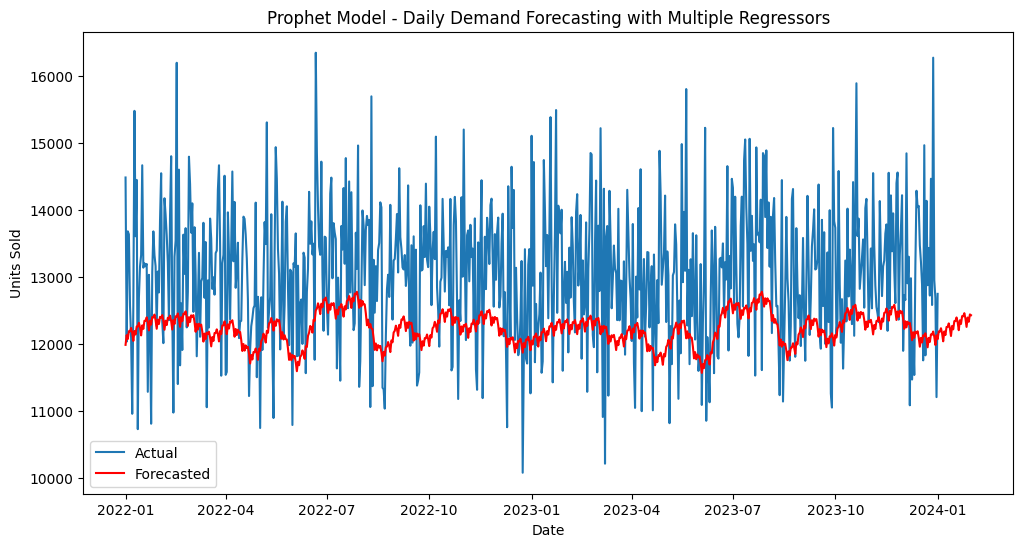

In [254]:
import numpy as np
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from math import sqrt
import matplotlib.pyplot as plt


# Encode the 'Seasonality' column
le_season = LabelEncoder()
df['Seasonality'] = le_season.fit_transform(df['Seasonality'])

# Encode the 'Weather Condition' column
le_weather = LabelEncoder()
df['Weather Condition'] = le_weather.fit_transform(df['Weather Condition'])

# Aggregate the data by day to calculate daily demand
daily_demand = df.resample('D').sum().reset_index()

# Rename columns for Prophet
prophet_data = daily_demand.rename(columns={
    'Date': 'ds',
    'Units Sold': 'y',
    'Discount': 'discount',
    'Holiday/Promotion': 'promotion',
    'Weather Condition': 'weather_condition',
    'Seasonality': 'season'
})

# Define Cross-Validation Function for Prophet
def cross_validate_prophet_with_multiple_regressors(data, n_splits=5):
    rmse_scores = []
    mae_scores = []
    r2_scores = []
    
    n = len(data)
    fold_size = n // (n_splits + 1)
    
    for i in range(1, n_splits + 1):
        train = data[: i * fold_size].reset_index(drop=True)
        test = data[i * fold_size: (i + 1) * fold_size].reset_index(drop=True)
        try:
            # Initialize Prophet with multiple regressors
            model = Prophet()
            model.add_regressor('discount')  # Add Discount as a regressor
            model.add_regressor('promotion')  # Add Holiday/Promotion as a regressor
            model.add_regressor('season')  # Add Seasonality as a regressor
            model.add_regressor('weather_condition')  # Add Weather Condition as a regressor
            model.fit(train)
            
            # Forecast
            future = test[['ds']].copy()  # Use the test dataset's dates for forecasting
            future['discount'] = test['discount'].values  # Add discount values to future DataFrame
            future['promotion'] = test['promotion'].values  # Add promotion values
            future['season'] = test['season'].values  # Add season values
            future['weather_condition'] = test['weather_condition'].values  # Add weather condition values
            forecast = model.predict(future)['yhat'].values
            
            # Evaluate
            rmse = sqrt(mean_squared_error(test['y'], forecast))
            mae = mean_absolute_error(test['y'], forecast)
            r2 = r2_score(test['y'], forecast)
            rmse_scores.append(rmse)
            mae_scores.append(mae)
            r2_scores.append(r2)
        except Exception as e:
            print(f"Fold {i} failed with error: {e}")
    
    # Handle cases where no valid folds exist
    if len(rmse_scores) == 0:
        return (np.nan, np.nan), (np.nan, np.nan), (np.nan, np.nan)
    
    return (np.mean(rmse_scores), np.std(rmse_scores)), \
           (np.mean(mae_scores), np.std(mae_scores)), \
           (np.mean(r2_scores), np.std(r2_scores))

# Perform Cross-Validation for Prophet with Multiple Regressors
(prophet_rmse, prophet_mae, prophet_r2) = cross_validate_prophet_with_multiple_regressors(prophet_data, n_splits=5)
print("\nProphet Cross Validation Results with Multiple Regressors:")
print(f"Mean RMSE: {prophet_rmse[0]:.2f} (Std: {prophet_rmse[1]:.2f})")
print(f"Mean MAE:  {prophet_mae[0]:.2f}  (Std: {prophet_mae[1]:.2f})")
print(f"Mean R²:   {prophet_r2[0]:.2f}   (Std: {prophet_r2[1]:.2f})")

# Fit the final Prophet model on the entire dataset
final_model_prophet = Prophet()
final_model_prophet.add_regressor('discount')  # Add Discount as a regressor
final_model_prophet.add_regressor('promotion')  # Add Promotion as a regressor
final_model_prophet.add_regressor('season')  # Add Season as a regressor
final_model_prophet.add_regressor('weather_condition')  # Add Weather Condition as a regressor
final_model_prophet.fit(prophet_data)

# Forecast future values
future = final_model_prophet.make_future_dataframe(periods=30)  # Forecast for 30 days
future['discount'] = 0  # Assume no discount for future periods (or set realistic values)
future['promotion'] = 0  # Assume no promotions for future periods (or set realistic values)
future['season'] = 0  # Assume no season for future periods (or set realistic values)
future['weather_condition'] = 0  # Assume neutral weather for future periods (or set realistic values)
forecast_prophet = final_model_prophet.predict(future)

# Display the forecasted values
print(forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(prophet_data['ds'], prophet_data['y'], label='Actual')
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Forecasted', color='red')
plt.title('Prophet Model - Daily Demand Forecasting with Multiple Regressors')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

20:03:18 - cmdstanpy - INFO - Chain [1] start processing
20:03:19 - cmdstanpy - INFO - Chain [1] done processing
20:03:19 - cmdstanpy - INFO - Chain [1] start processing
20:03:19 - cmdstanpy - INFO - Chain [1] done processing
20:03:19 - cmdstanpy - INFO - Chain [1] start processing
20:03:19 - cmdstanpy - INFO - Chain [1] done processing
20:03:19 - cmdstanpy - INFO - Chain [1] start processing
20:03:20 - cmdstanpy - INFO - Chain [1] done processing
20:03:20 - cmdstanpy - INFO - Chain [1] start processing
20:03:20 - cmdstanpy - INFO - Chain [1] done processing
20:03:20 - cmdstanpy - INFO - Chain [1] start processing



Prophet Cross Validation Results:
Mean RMSE: 1013.57 (Std: 63.19)
Mean MAE:  813.41  (Std: 52.74)
Mean R²:   -0.03   (Std: 0.02)


20:03:20 - cmdstanpy - INFO - Chain [1] done processing


            ds          yhat    yhat_lower    yhat_upper
726 2023-12-28  13015.982205  11710.269449  14235.259827
727 2023-12-29  12940.259395  11773.402392  14189.372683
728 2023-12-30  12810.695286  11505.047518  14093.114949
729 2023-12-31  12963.992327  11742.262181  14188.832959
730 2024-01-01  12897.687515  11711.037568  13975.730867
731    13014.246626
732    13010.815223
733    13063.982782
734    12991.428039
735    12865.205644
736    13022.037588
737    12959.450228
738    13079.869052
739    13080.371544
740    13137.454411
741    13068.683133
742    12945.983785
743    13105.940345
744    13045.938125
745    13168.265180
746    13169.871823
747    13227.144224
748    13157.559809
749    13032.984179
750    13189.972535
751    13125.916092
752    13243.145186
753    13238.689114
754    13289.048646
755    13211.848944
756    13079.132636
757    13227.656188
758    13155.030168
759    13263.815332
760    13251.274791
Name: yhat, dtype: float64


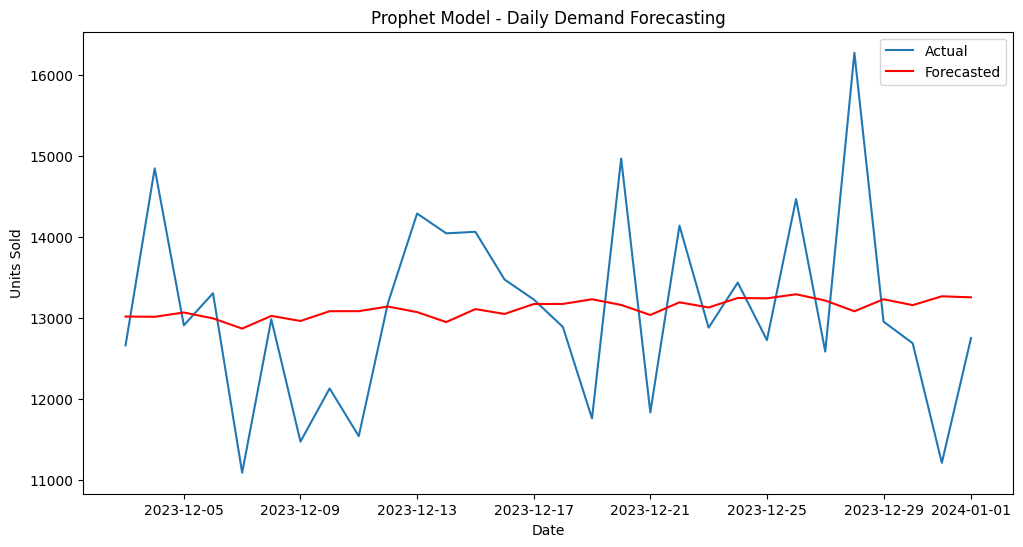

In [235]:
import numpy as np
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns



# Aggregate the data by day to calculate daily demand
daily_demand = df.resample('D').sum().reset_index()

# Define Cross-Validation Function for Prophet
def cross_validate_prophet(data, n_splits=5):
    rmse_scores = []
    mae_scores = []
    r2_scores = []
    
    n = len(data)
    fold_size = n // (n_splits + 1)
    
    for i in range(1, n_splits + 1):
        train = data[: i * fold_size].reset_index().rename(columns={'Date': 'ds', 'Units Sold': 'y'})
        test = data[i * fold_size: (i + 1) * fold_size]
        try:
            model = Prophet()
            model.fit(train)
            future = model.make_future_dataframe(periods=len(test))
            forecast = model.predict(future)['yhat'][-len(test):].values
            rmse = sqrt(mean_squared_error(test['Units Sold'], forecast))
            mae = mean_absolute_error(test['Units Sold'], forecast)
            r2 = r2_score(test['Units Sold'], forecast)
            rmse_scores.append(rmse)
            mae_scores.append(mae)
            r2_scores.append(r2)
        except Exception as e:
            print(f"Fold {i} failed with error: {e}")
    
    return (np.mean(rmse_scores), np.std(rmse_scores)), \
           (np.mean(mae_scores), np.std(mae_scores)), \
           (np.mean(r2_scores), np.std(r2_scores))

# Perform Cross-Validation for Prophet
(prophet_rmse, prophet_mae, prophet_r2) = cross_validate_prophet(daily_demand, n_splits=5)
print("\nProphet Cross Validation Results:")
print(f"Mean RMSE: {prophet_rmse[0]:.2f} (Std: {prophet_rmse[1]:.2f})")
print(f"Mean MAE:  {prophet_mae[0]:.2f}  (Std: {prophet_mae[1]:.2f})")
print(f"Mean R²:   {prophet_r2[0]:.2f}   (Std: {prophet_r2[1]:.2f})")

# Fit the final Prophet model on the entire dataset
prophet_data = daily_demand.rename(columns={'Date': 'ds', 'Units Sold': 'y'})
final_model_prophet = Prophet()
final_model_prophet.fit(prophet_data)
future = final_model_prophet.make_future_dataframe(periods=0)
forecast_prophet = final_model_prophet.predict(future)
print(forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Define the test set
test_size = 30  # Define the size of the test set
train = daily_demand[:-test_size]
test = daily_demand[-test_size:]

# Forecast the test set using the final Prophet model
future_test = final_model_prophet.make_future_dataframe(periods=test_size)
forecast_test = final_model_prophet.predict(future_test)
forecast_prophet_test = forecast_test['yhat'][-test_size:]

# Display the forecasted values
print(forecast_prophet_test)

# Plot actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(test['Date'], test['Units Sold'], label='Actual')
plt.plot(test['Date'], forecast_prophet_test, label='Forecasted', color='red')
plt.title('Prophet Model - Daily Demand Forecasting')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

## Forecasting and Performance Comparison

In [236]:
# Create a DataFrame to store the metrics results
metrics_comparison = pd.DataFrame({
    'Model': ['ARIMA', 'SARIMA', 'Prophet'],
    'RMSE Mean': [arima_rmse[0], sarima_rmse[0], prophet_rmse[0]],
    'RMSE Std': [arima_rmse[1], sarima_rmse[1], prophet_rmse[1]],
    'MAE Mean': [arima_mae[0], sarima_mae[0], prophet_mae[0]],
    'MAE Std': [arima_mae[1], sarima_mae[1], prophet_mae[1]],
    'R² Mean': [arima_r2[0], sarima_r2[0], prophet_r2[0]],
    'R² Std': [arima_r2[1], sarima_r2[1], prophet_r2[1]]
})

# Display the comparison table
print(metrics_comparison)

     Model    RMSE Mean    RMSE Std    MAE Mean    MAE Std   R² Mean    R² Std
0    ARIMA  1000.048167   60.476582  800.376068  46.388092 -0.001597  0.001924
1   SARIMA  1102.797509  110.421438  886.529213  80.361009 -0.222181  0.172222
2  Prophet  1013.574118   63.193590  813.407593  52.735478 -0.028937  0.024691


## Conclusion